#  Waveguides of different bends

In [2]:
import meep as mp
from meep import mpb
print(mp.__version__)
import meep.adjoint as mpa
import math
import numpy as np
from autograd import numpy as npa
from matplotlib import pyplot as plt
from IPython.display import Video


mp.Verbosity(0)

1.27.0


Verbosity: level=1

## S-bend

In [3]:
geometry=[]

# the following functions are to be appended to an empty geometry=[]

class center():
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z


def s_bend(design=0,center=center(0,0,0),bend_radius=5, turn_angle=np.pi/2,mid_section_waveguide_length=0, waveguide_width=0.5, waveguide_height=0.22, waveguide_material=mp.Medium(index=3.45), cladding_material=mp.air):

    # design 0 is for top eft to bottom right, and 1 is for bottom left to top right
    
    block_height= mid_section_waveguide_length * np.sin(turn_angle) + 2*(bend_radius - bend_radius*np.cos(turn_angle)) + waveguide_width
    block_width= mid_section_waveguide_length * np.cos(turn_angle) + 2* bend_radius* np.sin(turn_angle)  


    # inner_circle_x=r*sin(theta)
    # inner_circle_y=r*cos(theta)
    # y is given, so x = r*sin(cosinv(y/r))

    # ____________
    # |          |
    # |   /      |
    # |_ /_______|
    # | /
    # |/


    #the main block
    geometry.append(mp.Block(material=Si, center=mp.Vector3(center.x,center.y,center.z), size=mp.Vector3(block_width, block_height)))

    offset=waveguide_width *np.cos(turn_angle)/2

    if(design==0):

        #top left inner circle
        y=0
        inner_bend_radius=bend_radius-waveguide_width/2
        while(y+(inner_bend_radius)*np.cos(turn_angle) < inner_bend_radius):
            x = inner_bend_radius * np.sin(np.arccos((y+(inner_bend_radius)*np.cos(turn_angle)  )/inner_bend_radius))
            geometry.append(mp.Block(material=mp.air, center=mp.Vector3(-(block_width/2)+(x)/2+center.x,y+center.y-offset,center.z), size=mp.Vector3(x,1/resolution)))
            y=y+1/(2*resolution) # this multiplying by 2 removes the black strip  error

        # bottom right inner circle
        y=0
        inner_bend_radius=bend_radius-waveguide_width/2
        while(y+(inner_bend_radius)*np.cos(turn_angle) < inner_bend_radius):
            x = inner_bend_radius * np.sin(np.arccos((y+(inner_bend_radius)*np.cos(turn_angle)  )/inner_bend_radius))
            geometry.append(mp.Block(material=mp.air, center=mp.Vector3((block_width/2)-(x)/2+center.x,-y+center.y+offset,center.z), size=mp.Vector3(x,1/resolution)))
            y=y+1/(2*resolution) # this multiplying by 2 removes the black strip  error  

        # top right outer portion
        y=0
        outer_bend_radius=bend_radius+waveguide_width/2
        while(y+(outer_bend_radius)*np.cos(turn_angle) < outer_bend_radius):
            x = block_width - (outer_bend_radius * np.sin(np.arccos((y+(outer_bend_radius)*np.cos(turn_angle)  )/outer_bend_radius)))
            geometry.append(mp.Block(material=mp.air, center=mp.Vector3((block_width/2)-(x)/2+center.x,y+center.y+offset,center.z), size=mp.Vector3(x,1/resolution)))
            y=y+1/(2*resolution) # this multiplying by 2 removes the black strip  error

        # bottom left outer portion
        y=0
        outer_bend_radius=bend_radius+waveguide_width/2
        while(y+(outer_bend_radius)*np.cos(turn_angle) < outer_bend_radius):
            x = block_width - (outer_bend_radius * np.sin(np.arccos((y+(outer_bend_radius)*np.cos(turn_angle)  )/outer_bend_radius)))
            geometry.append(mp.Block(material=mp.air, center=mp.Vector3(-(block_width/2)+(x)/2+center.x,-y+center.y-offset,center.z), size=mp.Vector3(x,1/resolution)))
            y=y+1/(2*resolution) # this multiplying by 2 removes the black strip  error

    


    #reference waveguide
    # xx=4
    # geometry.append (mp.Block(center=mp.Vector3(-(block_width/2+xx/2)-2/resolution,block_height/2-waveguide_width/2,0),
    #                     size=mp.Vector3(xx,waveguide_width,waveguide_height),
    #                     material=Si))

    if(design==1):


        # bottom left inner circle
        y=0
        inner_bend_radius=bend_radius-waveguide_width/2
        while(y+(inner_bend_radius)*np.cos(turn_angle) < inner_bend_radius):
            x = inner_bend_radius * np.sin(np.arccos((y+(inner_bend_radius)*np.cos(turn_angle)  )/inner_bend_radius))
            geometry.append(mp.Block(material=mp.air, center=mp.Vector3(-(block_width/2)+(x)/2+center.x,-y+center.y+offset,center.z), size=mp.Vector3(x,1/resolution)))
            y=y+1/resolution   


        # top right inner circle
        y=0
        inner_bend_radius=bend_radius-waveguide_width/2
        while(y+(inner_bend_radius)*np.cos(turn_angle) < inner_bend_radius):
            x = inner_bend_radius * np.sin(np.arccos((y+(inner_bend_radius)*np.cos(turn_angle)  )/inner_bend_radius))
            geometry.append(mp.Block(material=mp.air, center=mp.Vector3((block_width/2)-(x)/2+center.x,y+center.y-offset,center.z), size=mp.Vector3(x,1/resolution)))
            y=y+1/resolution

        # top left outer portion
        y=0
        outer_bend_radius=bend_radius+waveguide_width/2
        while(y+(outer_bend_radius)*np.cos(turn_angle) < outer_bend_radius):
            x = block_width - (outer_bend_radius * np.sin(np.arccos((y+(outer_bend_radius)*np.cos(turn_angle)  )/outer_bend_radius)))
            geometry.append(mp.Block(material=mp.air, center=mp.Vector3(-(block_width/2)+(x)/2+center.x,y+center.y+offset,center.z), size=mp.Vector3(x,1/resolution)))
            y=y+1/(2*resolution) # this multiplying by 2 removes the black strip  error

        # bottom right outer portion
        y=0
        outer_bend_radius=bend_radius+waveguide_width/2
        while(y+(outer_bend_radius)*np.cos(turn_angle) < outer_bend_radius):
            x = block_width - (outer_bend_radius * np.sin(np.arccos((y+(outer_bend_radius)*np.cos(turn_angle)  )/outer_bend_radius)))
            geometry.append(mp.Block(material=mp.air, center=mp.Vector3((block_width/2)-(x)/2+center.x,-y+center.y-offset,center.z), size=mp.Vector3(x,1/resolution)))
            y=y+1/(2*resolution) # this multiplying by 2 removes the black strip  error   

    




In [4]:

resolution=100
nSi = 3.45
Si = mp.Medium(index=nSi)
nSiO2 = 1.45
SiO2 = mp.Medium(index=nSiO2)

sxy = 10
sz = 4
cell_size = mp.Vector3(sxy,sxy,sz)

geometry = []
s_bend(design=1,center=center(0,0,0),bend_radius=4, turn_angle=np.pi/3,mid_section_waveguide_length=0, waveguide_width=0.5, waveguide_height=0.22, waveguide_material=mp.Medium(index=3.45), cladding_material=mp.air)


dpml = 1.0
boundary_layers = [mp.PML(dpml)]

# mode frequency
fcen = 1/1.55

sources = [mp.EigenModeSource(src=mp.GaussianSource(fcen, fwidth=0.2*fcen),
                              size=mp.Vector3(0,0,0),
                              center=mp.Vector3(-0.5*sxy+dpml+1.5,0,0),
                              eig_match_freq=True,
                              eig_parity=mp.ODD_Y)]





sim = mp.Simulation(resolution=resolution,
                    cell_size=cell_size,
                    boundary_layers=boundary_layers,
                    geometry=geometry,
                    sources=sources,
                    dimensions=3)

     block, center = (0,0,0)
          size (6.9282,4.5,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
     block, center = (-1.8403,0.125,0)
          size (3.2476,0.01,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (-1.8432,0.115,0)
          size (3.2418,0.01,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (-1.84612,0.105,0)
          size (3.23597,0.01,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (-1.84906,0.095,0)
          size (3.23009,0.01,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (-1.85202,0.085,0)
          size (3.22417,0.01,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilo

     ...(+ 1219 objects not shown)...


<Axes: xlabel='X', ylabel='Y'>

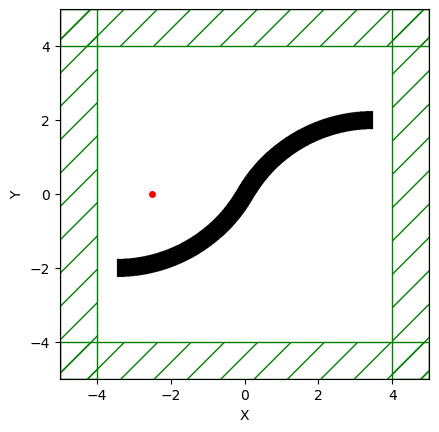

In [5]:
sim.plot2D(
    output_plane = mp.Volume(
        center = mp.Vector3(z=0.0),
        size = mp.Vector3(x=sxy,y=sxy)
    ))

## Circular arc waveguide